# Deep Learning Illustarted first Neural Network

In [38]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

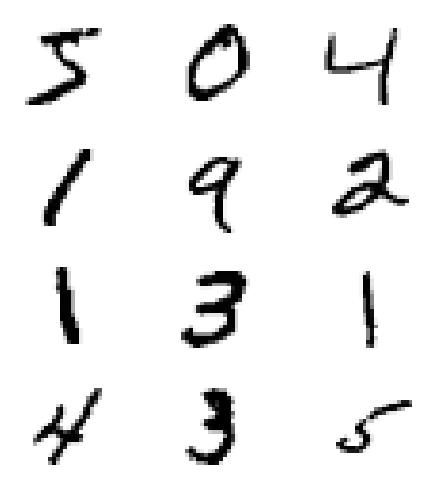

In [15]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(4, 3, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Preprocess data

Наши действия:
- Преобразование двумерных изображений в одномерные массивы.
- Преобразование целочисленных значений пикселов в вещественные от 0 до 1.
- Преобразование меток из целочисленных значений(лейбл) в бинарный вид.

In [17]:
# Преобразование двумерных изображений в одномерные массивы
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [18]:
# Преобразование целочисленных значений пикселов в вещественные
X_train /= 255
X_valid /= 255

In [20]:
# Преобразование меток из целочисленных значений в двумерный набор данных, состоящий из 0 и 1:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Projecting a neural network architecture 

In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [27]:
# Реализация архитектуры неглубокой нейронной сети
model = Sequential()                                               # создаем объект модели нейронной сети                  
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))     # определяем атрибуты скрытого слоя
model.add(Dense(10, activation='softmax'))                         # определяем параметры выходного слоя

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,892 (198.80 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Training a deep learning model

In [30]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/20
 57/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8889 - loss: 0.3998

2024-04-06 14:50:34.101252: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8936 - loss: 0.3984 - val_accuracy: 0.9004 - val_loss: 0.3771
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8959 - loss: 0.3883 - val_accuracy: 0.9016 - val_loss: 0.3711
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.3867 - val_accuracy: 0.9027 - val_loss: 0.3649
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8976 - loss: 0.3783 - val_accuracy: 0.9037 - val_loss: 0.3597
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8985 - loss: 0.3747 - val_accuracy: 0.9049 - val_loss: 0.3546
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.3687 - val_accuracy: 0.9067 - val_loss: 0.3500
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8990 - loss: 0.3649 - val_accuracy: 0.9080 - val_loss: 0.3457
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.3548 - val_accuracy: 0.9089 - val_

## Test

In [37]:
prediction = model.predict(X_valid[:1])
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[2.4732170e-04, 7.4816353e-06, 2.8890333e-04, 3.0135443e-03,
        2.2793374e-05, 1.8445186e-04, 6.1535360e-07, 9.9341327e-01,
        5.9769038e-05, 2.7618534e-03]], dtype=float32)

In [40]:
prediction_cls = np.argmax(prediction)
prediction_cls

7

In [43]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])